In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

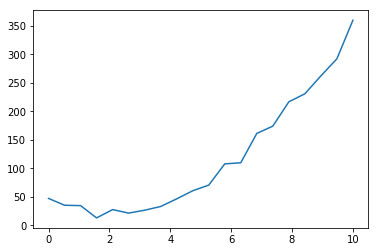

In [2]:
N = 20
noise = 10
xs = np.linspace(0,10,N)
ys = 5 * (xs ** 2) - 20 * xs + 50 + np.random.normal(0,noise,N)

plt.plot(xs, ys)

In [3]:
class LeastSquares_ML(object):
    def __init__(self):
        pass
    
    def train(self, X, y):
        '''X is a (N x K) matrix of N examples, K features, and y is a Nx1 target vector'''
        assert(np.shape(X)[0] == len(y))
        N = np.shape(X)[0]
        X = np.c_[ np.ones((N,1)), X] # Add bias feature of all 1's. so X is now Nx(K+1)
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.transpose(X)), y)
        self.B = np.mean(np.square(y - np.dot(X, self.w)))
        return self
    
    def predict(self, X):
        assert(len(self.w) == (1 + np.shape(X)[1]))
        N = np.shape(X)[0]
        X = np.c_[ np.ones((N,1)), X]
        return np.dot(X, self.w)

class Regularized_LeastSquares_ML(LeastSquares_ML):
    def __init__(self, lam=0.0):
        self.lam = lam
        super(Regularized_LeastSquares_ML, self).__init__()
    
    def train(self, X, y):
        assert(np.shape(X)[0] == len(y))
        N = np.shape(X)[0]
        X = np.c_[ np.ones((N,1)), X] # Add bias feature of all 1's. so X is now Nx(K+1)
        K = np.shape(X)[1]
        self.w = np.dot(np.dot(np.linalg.inv(self.lam * np.eye(K) + np.dot(np.transpose(X), X)), np.transpose(X)), y)
        self.B = np.mean(np.square(y - np.dot(X, self.w)))
        return self

class LeastSquares_ML_Polynomial(Regularized_LeastSquares_ML):
    def __init__(self, max_degree=1, *args, **kwargs):
        assert(int(max_degree) == max_degree)
        assert(max_degree > 0)
        self.max_degree = max_degree
        super(LeastSquares_ML_Polynomial, self).__init__(*args, **kwargs)
    
    def _augment_features(self, X):
        augmentedX = X.copy()
        for degree in range(2, self.max_degree + 1):
            augmentedX = np.c_[ augmentedX, np.power(X, degree) ]
        return augmentedX
    
    def train(self, X, y):
        return super(LeastSquares_ML_Polynomial, self).train(self._augment_features(X), y)
    
    def predict(self, X):
        return super(LeastSquares_ML_Polynomial, self).predict(self._augment_features(X))

[-36.9112616   30.71203184] 42.7057209511
[ 43.51195606 -20.22267268   5.09347045] 8.73570374525
[ 30.15845608 -14.66658522   4.62768223] 10.0314896487


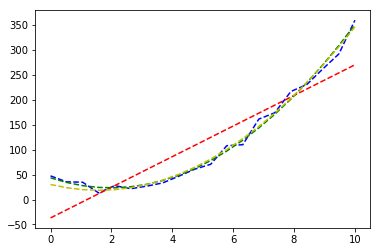

In [4]:
plt.plot(xs, ys, 'b--')

X = xs.reshape((len(xs),1))
model = LeastSquares_ML().train(X, ys)
plt.plot(xs, model.predict(X), 'r--')

# add squared feature
model_poly = LeastSquares_ML_Polynomial(max_degree=2).train(X, ys)
plt.plot(xs, model_poly.predict(X), 'g--')

# add squared feature
model_poly_reg = LeastSquares_ML_Polynomial(max_degree=2, lam=1.).train(X, ys)
plt.plot(xs, model_poly_reg.predict(X), 'y--')

print(model.w, np.sqrt(model.B))
print(model_poly.w, np.sqrt(model_poly.B))
print(model_poly_reg.w, np.sqrt(model_poly_reg.B))